# TCCA Program

**Features**
<br>1) This program computes dice overlap between images in MNI152 space.

<br>2) The dice overlap is computed between the input and a choice of five atlases namely **Harvard-Oxford atlas, Juelich atlas, Von Economo atlas, Glasser atlas and Brodmann atlas.**

<br>3) If the shape of the input is not same as the shape of the atlas image, the input image is resampled in accordance with the atlas image using Nilearn.

<br>4) The dice overlap is computed between the input and all the regions of the chosen atlas.

The following program is an illustration of TCCA toolbox. The tcca_all_atlases module contains of tcca function which is called below. This function takes an input image and compares the overlap between that input image and each region of all the available atlases.

In [1]:
#Import necessary Python Packages
import os
import re
import nibabel as nib
import glob
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import tcca_all_atlases

In [2]:
#Sort the numbers into ascending order of value
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [3]:
#Example to check the working of the module. A random region from one of the atlases is taken as input
input_dir = '/Users/shreyasindurkar/Desktop/Data/Atlases/Harvard_Oxford_Atlas/Left/'
os.chdir(input_dir)
input_files=sorted(glob.glob("*.nii.gz"), key = numericalSort)
filename=input_files[10]
print(filename)
input_img=os.path.join(input_dir + str(filename))
#input_image = nib.load(input_img)

11.nii.gz


provide path to the input directory/Users/shreyasindurkar/Desktop/Data/Atlases/Harvard_Oxford_Atlas/Left/
provide path to the atlas directory/Users/shreyasindurkar/Desktop/Data/Atlases/
Brodmann_Atlas
/Users/shreyasindurkar/Desktop/Data/Atlases/Brodmann_Atlas/Left/
1000.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:08:03,753 nipype.interface INFO:
	 stdout 2023-03-15T18:08:03.753205:551679 551679.000000 
230315-18:08:04,584 nipype.interface INFO:
	 stdout 2023-03-15T18:08:04.584610:1558 1558.000000 
230315-18:08:04,893 nipype.interface INFO:
	 stdout 2023-03-15T18:08:04.892994:603 603.000000 
1001.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:08:07,230 nipype.interface INFO:
	 stdout 2023-03-15T18:08:07.230409:551679 551679.000000 
230315-18:08:08,54 nipype.interface INFO:
	 stdout 2023-03-15T18:08:08.053936:6001 6001.000000 
230315-18:08:08,362 nipype.interface INFO:
	 stdout 2023-03-15T18:08:08.3623

1021.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:09:18,379 nipype.interface INFO:
	 stdout 2023-03-15T18:09:18.379483:551679 551679.000000 
230315-18:09:19,199 nipype.interface INFO:
	 stdout 2023-03-15T18:09:19.198945:1458 1458.000000 
230315-18:09:19,504 nipype.interface INFO:
	 stdout 2023-03-15T18:09:19.504832:726 726.000000 
1022.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:09:21,919 nipype.interface INFO:
	 stdout 2023-03-15T18:09:21.919281:551679 551679.000000 
230315-18:09:22,751 nipype.interface INFO:
	 stdout 2023-03-15T18:09:22.751706:907 907.000000 
230315-18:09:23,58 nipype.interface INFO:
	 stdout 2023-03-15T18:09:23.058582:20 20.000000 
1023.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:09:25,434 nipype.interface INFO:
	 stdout 2023-03-15T18:09:25.434554:551679 551679.000000 
230315-18:09:26,258 nipype.interface INFO:
	 stdout 2023-03-15T18:

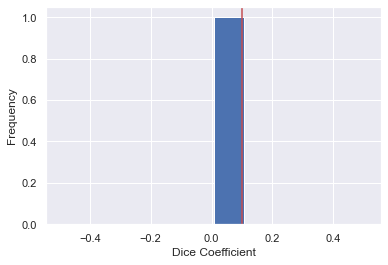

/Users/shreyasindurkar/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/shreyasindurkar/opt/anaconda3/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


Kleist_Atlas
/Users/shreyasindurkar/Desktop/Data/Atlases/Kleist_Atlas/Left/
1000.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:10:28,362 nipype.interface INFO:
	 stdout 2023-03-15T18:10:28.362065:551679 551679.000000 
230315-18:10:29,226 nipype.interface INFO:
	 stdout 2023-03-15T18:10:29.226356:1495 1495.000000 
230315-18:10:29,546 nipype.interface INFO:
	 stdout 2023-03-15T18:10:29.545930:576 576.000000 
1001.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:10:31,923 nipype.interface INFO:
	 stdout 2023-03-15T18:10:31.923582:551679 551679.000000 
230315-18:10:32,770 nipype.interface INFO:
	 stdout 2023-03-15T18:10:32.769971:5409 5409.000000 
230315-18:10:33,88 nipype.interface INFO:
	 stdout 2023-03-15T18:10:33.088477:1670 1670.000000 
1002.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:10:35,453 nipype.interface INFO:
	 stdout 2023-03-15T18:10:35.453875:551679

230315-18:11:45,0 nipype.interface INFO:
	 stdout 2023-03-15T18:11:45.000284:19 19.000000 
1022.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:11:47,377 nipype.interface INFO:
	 stdout 2023-03-15T18:11:47.377414:551679 551679.000000 
230315-18:11:48,228 nipype.interface INFO:
	 stdout 2023-03-15T18:11:48.228597:6354 6354.000000 
230315-18:11:48,555 nipype.interface INFO:
	 stdout 2023-03-15T18:11:48.555687:272 272.000000 
1023.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:11:51,72 nipype.interface INFO:
	 stdout 2023-03-15T18:11:51.072324:551679 551679.000000 
230315-18:11:51,974 nipype.interface INFO:
	 stdout 2023-03-15T18:11:51.974215:4303 4303.000000 
230315-18:11:52,298 nipype.interface INFO:
	 stdout 2023-03-15T18:11:52.298638:6 6.000000 
1024.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:11:54,690 nipype.interface INFO:
	 stdout 2023-03-15T18:11:54.6906

230315-18:13:06,306 nipype.interface INFO:
	 stdout 2023-03-15T18:13:06.305795:3391 3391.000000 
230315-18:13:06,626 nipype.interface INFO:
	 stdout 2023-03-15T18:13:06.626548:1692 1692.000000 
1044.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:13:09,2 nipype.interface INFO:
	 stdout 2023-03-15T18:13:09.001989:551679 551679.000000 
230315-18:13:09,858 nipype.interface INFO:
	 stdout 2023-03-15T18:13:09.858163:2128 2128.000000 
230315-18:13:10,181 nipype.interface INFO:
	 stdout 2023-03-15T18:13:10.181097:1059 1059.000000 
1045.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:13:12,612 nipype.interface INFO:
	 stdout 2023-03-15T18:13:12.612624:551679 551679.000000 
230315-18:13:13,531 nipype.interface INFO:
	 stdout 2023-03-15T18:13:13.531581:2822 2822.000000 
230315-18:13:13,867 nipype.interface INFO:
	 stdout 2023-03-15T18:13:13.867684:1415 1415.000000 
1046.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Refe

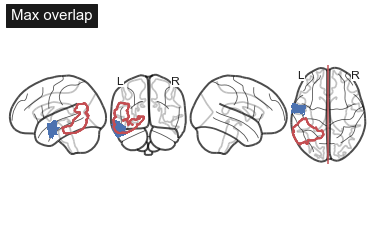

/Users/shreyasindurkar/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/shreyasindurkar/opt/anaconda3/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


Campbell_Atlas
/Users/shreyasindurkar/Desktop/Data/Atlases/Campbell_Atlas/Left/
1000.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:13:34,993 nipype.interface INFO:
	 stdout 2023-03-15T18:13:34.993516:551679 551679.000000 
230315-18:13:35,872 nipype.interface INFO:
	 stdout 2023-03-15T18:13:35.872015:1550 1550.000000 
230315-18:13:36,230 nipype.interface INFO:
	 stdout 2023-03-15T18:13:36.230319:582 582.000000 
1001.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:13:38,787 nipype.interface INFO:
	 stdout 2023-03-15T18:13:38.787494:551679 551679.000000 
230315-18:13:39,658 nipype.interface INFO:
	 stdout 2023-03-15T18:13:39.658346:15187 15187.000000 
230315-18:13:40,10 nipype.interface INFO:
	 stdout 2023-03-15T18:13:40.010054:248 248.000000 
1002.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:13:42,556 nipype.interface INFO:
	 stdout 2023-03-15T18:13:42.556674:55

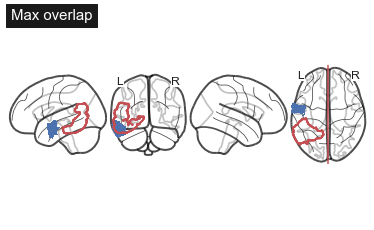

/Users/shreyasindurkar/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/shreyasindurkar/opt/anaconda3/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


Glasser_Atlas
/Users/shreyasindurkar/Desktop/Data/Atlases/Glasser_Atlas/Left/
1.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:14:44,149 nipype.interface INFO:
	 stdout 2023-03-15T18:14:44.149099:269413 269413.000000 
230315-18:14:44,888 nipype.interface INFO:
	 stdout 2023-03-15T18:14:44.888522:10831 10831.000000 
230315-18:14:45,160 nipype.interface INFO:
	 stdout 2023-03-15T18:14:45.160568:0 0.000000 
2.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:14:46,957 nipype.interface INFO:
	 stdout 2023-03-15T18:14:46.957611:269413 269413.000000 
230315-18:14:47,718 nipype.interface INFO:
	 stdout 2023-03-15T18:14:47.717963:411 411.000000 
230315-18:14:47,989 nipype.interface INFO:
	 stdout 2023-03-15T18:14:47.988941:0 0.000000 
3.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:14:49,809 nipype.interface INFO:
	 stdout 2023-03-15T18:14:49.808139:269413 269413.000000 


23.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:15:46,706 nipype.interface INFO:
	 stdout 2023-03-15T18:15:46.706578:269413 269413.000000 
230315-18:15:47,436 nipype.interface INFO:
	 stdout 2023-03-15T18:15:47.436019:1057 1057.000000 
230315-18:15:47,704 nipype.interface INFO:
	 stdout 2023-03-15T18:15:47.704059:0 0.000000 
24.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:15:49,497 nipype.interface INFO:
	 stdout 2023-03-15T18:15:49.497435:269413 269413.000000 
230315-18:15:50,255 nipype.interface INFO:
	 stdout 2023-03-15T18:15:50.254927:858 858.000000 
230315-18:15:50,526 nipype.interface INFO:
	 stdout 2023-03-15T18:15:50.526160:383 383.000000 
25.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:15:52,336 nipype.interface INFO:
	 stdout 2023-03-15T18:15:52.336049:269413 269413.000000 
230315-18:15:53,130 nipype.interface INFO:
	 stdout 2023-03-15T18:15:53.1

230315-18:16:49,993 nipype.interface INFO:
	 stdout 2023-03-15T18:16:49.992664:2402 2402.000000 
230315-18:16:50,277 nipype.interface INFO:
	 stdout 2023-03-15T18:16:50.277236:0 0.000000 
46.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:16:52,93 nipype.interface INFO:
	 stdout 2023-03-15T18:16:52.093056:269413 269413.000000 
230315-18:16:52,829 nipype.interface INFO:
	 stdout 2023-03-15T18:16:52.829381:1117 1117.000000 
230315-18:16:53,102 nipype.interface INFO:
	 stdout 2023-03-15T18:16:53.102198:0 0.000000 
47.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:16:54,901 nipype.interface INFO:
	 stdout 2023-03-15T18:16:54.901633:269413 269413.000000 
230315-18:16:55,635 nipype.interface INFO:
	 stdout 2023-03-15T18:16:55.635495:1963 1963.000000 
230315-18:16:55,907 nipype.interface INFO:
	 stdout 2023-03-15T18:16:55.906973:0 0.000000 
48.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0,

230315-18:17:52,522 nipype.interface INFO:
	 stdout 2023-03-15T18:17:52.522407:0 0.000000 
68.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:17:54,336 nipype.interface INFO:
	 stdout 2023-03-15T18:17:54.335770:269413 269413.000000 
230315-18:17:55,127 nipype.interface INFO:
	 stdout 2023-03-15T18:17:55.126943:2365 2365.000000 
230315-18:17:55,396 nipype.interface INFO:
	 stdout 2023-03-15T18:17:55.396680:0 0.000000 
69.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:17:57,191 nipype.interface INFO:
	 stdout 2023-03-15T18:17:57.191335:269413 269413.000000 
230315-18:17:57,932 nipype.interface INFO:
	 stdout 2023-03-15T18:17:57.932305:4553 4553.000000 
230315-18:17:58,201 nipype.interface INFO:
	 stdout 2023-03-15T18:17:58.201685:0 0.000000 
70.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:17:59,994 nipype.interface INFO:
	 stdout 2023-03-15T18:17:59.994595:269413

90.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:18:56,429 nipype.interface INFO:
	 stdout 2023-03-15T18:18:56.428734:269413 269413.000000 
230315-18:18:57,183 nipype.interface INFO:
	 stdout 2023-03-15T18:18:57.183522:2358 2358.000000 
230315-18:18:57,458 nipype.interface INFO:
	 stdout 2023-03-15T18:18:57.458137:0 0.000000 
91.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:18:59,275 nipype.interface INFO:
	 stdout 2023-03-15T18:18:59.274693:269413 269413.000000 
230315-18:19:00,42 nipype.interface INFO:
	 stdout 2023-03-15T18:19:00.042270:2713 2713.000000 
230315-18:19:00,313 nipype.interface INFO:
	 stdout 2023-03-15T18:19:00.313375:0 0.000000 
92.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:19:02,109 nipype.interface INFO:
	 stdout 2023-03-15T18:19:02.109072:269413 269413.000000 
230315-18:19:02,871 nipype.interface INFO:
	 stdout 2023-03-15T18:19:02.8708

112.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:19:58,653 nipype.interface INFO:
	 stdout 2023-03-15T18:19:58.653283:269413 269413.000000 
230315-18:19:59,391 nipype.interface INFO:
	 stdout 2023-03-15T18:19:59.390683:1585 1585.000000 
230315-18:19:59,660 nipype.interface INFO:
	 stdout 2023-03-15T18:19:59.660044:752 752.000000 
113.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:20:01,459 nipype.interface INFO:
	 stdout 2023-03-15T18:20:01.458831:269413 269413.000000 
230315-18:20:02,229 nipype.interface INFO:
	 stdout 2023-03-15T18:20:02.228745:840 840.000000 
230315-18:20:02,497 nipype.interface INFO:
	 stdout 2023-03-15T18:20:02.497728:464 464.000000 
114.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:20:04,302 nipype.interface INFO:
	 stdout 2023-03-15T18:20:04.302333:269413 269413.000000 
230315-18:20:05,69 nipype.interface INFO:
	 stdout 2023-03-15T18:2

134.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:21:01,679 nipype.interface INFO:
	 stdout 2023-03-15T18:21:01.679213:269413 269413.000000 
230315-18:21:02,410 nipype.interface INFO:
	 stdout 2023-03-15T18:21:02.409828:3327 3327.000000 
230315-18:21:02,684 nipype.interface INFO:
	 stdout 2023-03-15T18:21:02.684815:1718 1718.000000 
135.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:21:04,499 nipype.interface INFO:
	 stdout 2023-03-15T18:21:04.499368:269413 269413.000000 
230315-18:21:05,252 nipype.interface INFO:
	 stdout 2023-03-15T18:21:05.251868:3728 3728.000000 
230315-18:21:05,520 nipype.interface INFO:
	 stdout 2023-03-15T18:21:05.519962:2015 2015.000000 
136.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:21:07,321 nipype.interface INFO:
	 stdout 2023-03-15T18:21:07.321407:269413 269413.000000 
230315-18:21:08,139 nipype.interface INFO:
	 stdout 2023-03-

156.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:22:03,929 nipype.interface INFO:
	 stdout 2023-03-15T18:22:03.929164:269413 269413.000000 
230315-18:22:04,666 nipype.interface INFO:
	 stdout 2023-03-15T18:22:04.666538:495 495.000000 
230315-18:22:04,935 nipype.interface INFO:
	 stdout 2023-03-15T18:22:04.935221:0 0.000000 
157.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:22:06,725 nipype.interface INFO:
	 stdout 2023-03-15T18:22:06.725349:269413 269413.000000 
230315-18:22:07,484 nipype.interface INFO:
	 stdout 2023-03-15T18:22:07.483801:1012 1012.000000 
230315-18:22:07,751 nipype.interface INFO:
	 stdout 2023-03-15T18:22:07.751440:0 0.000000 
158.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:22:09,550 nipype.interface INFO:
	 stdout 2023-03-15T18:22:09.550566:269413 269413.000000 
230315-18:22:10,308 nipype.interface INFO:
	 stdout 2023-03-15T18:22:10.30

178.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:23:06,450 nipype.interface INFO:
	 stdout 2023-03-15T18:23:06.450341:269413 269413.000000 
230315-18:23:07,179 nipype.interface INFO:
	 stdout 2023-03-15T18:23:07.178973:692 692.000000 
230315-18:23:07,460 nipype.interface INFO:
	 stdout 2023-03-15T18:23:07.460216:362 362.000000 
179.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:23:09,264 nipype.interface INFO:
	 stdout 2023-03-15T18:23:09.264383:269413 269413.000000 
230315-18:23:09,997 nipype.interface INFO:
	 stdout 2023-03-15T18:23:09.997235:1055 1055.000000 
230315-18:23:10,265 nipype.interface INFO:
	 stdout 2023-03-15T18:23:10.265199:0 0.000000 
180.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:23:12,88 nipype.interface INFO:
	 stdout 2023-03-15T18:23:12.088513:269413 269413.000000 
230315-18:23:12,852 nipype.interface INFO:
	 stdout 2023-03-15T18:23:12

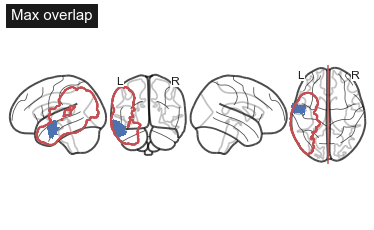

/Users/shreyasindurkar/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/shreyasindurkar/opt/anaconda3/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


Juelich_hist_Atlas
/Users/shreyasindurkar/Desktop/Data/Atlases/Juelich_hist_Atlas/Left/
1.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:23:16,409 nipype.interface INFO:
	 stdout 2023-03-15T18:23:16.408992:5605 5605.000000 
230315-18:23:17,241 nipype.interface INFO:
	 stdout 2023-03-15T18:23:17.241067:8204 8204.000000 
230315-18:23:17,545 nipype.interface INFO:
	 stdout 2023-03-15T18:23:17.545611:0 0.000000 
3.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:23:17,849 nipype.interface INFO:
	 stdout 2023-03-15T18:23:17.849195:5605 5605.000000 
230315-18:23:18,672 nipype.interface INFO:
	 stdout 2023-03-15T18:23:18.671899:2309 2309.000000 
230315-18:23:18,974 nipype.interface INFO:
	 stdout 2023-03-15T18:23:18.974021:0 0.000000 
5.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:23:19,278 nipype.interface INFO:
	 stdout 2023-03-15T18:23:19.278192:5605 5605.000000 
23

230315-18:23:48,52 nipype.interface INFO:
	 stdout 2023-03-15T18:23:48.052491:5605 5605.000000 
230315-18:23:48,875 nipype.interface INFO:
	 stdout 2023-03-15T18:23:48.874685:2700 2700.000000 
230315-18:23:49,175 nipype.interface INFO:
	 stdout 2023-03-15T18:23:49.175378:0 0.000000 
47.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:23:49,483 nipype.interface INFO:
	 stdout 2023-03-15T18:23:49.483545:5605 5605.000000 
230315-18:23:50,309 nipype.interface INFO:
	 stdout 2023-03-15T18:23:50.308930:9093 9093.000000 
230315-18:23:50,610 nipype.interface INFO:
	 stdout 2023-03-15T18:23:50.610779:0 0.000000 
49.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:23:50,919 nipype.interface INFO:
	 stdout 2023-03-15T18:23:50.918947:5605 5605.000000 
230315-18:23:51,750 nipype.interface INFO:
	 stdout 2023-03-15T18:23:51.750547:3202 3202.000000 
230315-18:23:52,53 nipype.interface INFO:
	 stdout 2023-03-15T18:23:52.05

230315-18:24:20,887 nipype.interface INFO:
	 stdout 2023-03-15T18:24:20.887556:0 0.000000 
91.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:24:21,189 nipype.interface INFO:
	 stdout 2023-03-15T18:24:21.189199:5605 5605.000000 
230315-18:24:22,29 nipype.interface INFO:
	 stdout 2023-03-15T18:24:22.029673:57881 57881.000000 
230315-18:24:22,343 nipype.interface INFO:
	 stdout 2023-03-15T18:24:22.343396:0 0.000000 
94.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:24:22,666 nipype.interface INFO:
	 stdout 2023-03-15T18:24:22.665820:5605 5605.000000 
230315-18:24:23,501 nipype.interface INFO:
	 stdout 2023-03-15T18:24:23.500997:4899 4899.000000 
230315-18:24:23,804 nipype.interface INFO:
	 stdout 2023-03-15T18:24:23.804575:12 12.000000 
95.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:24:24,111 nipype.interface INFO:
	 stdout 2023-03-15T18:24:24.111055:5605 5605.0

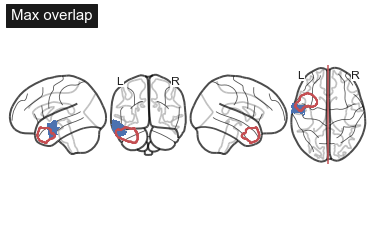

EconomoCT_Atlas
/Users/shreyasindurkar/Desktop/Data/Atlases/EconomoCT_Atlas/Left/
1000.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:24:51,28 nipype.interface INFO:
	 stdout 2023-03-15T18:24:51.028617:551679 551679.000000 
230315-18:24:51,895 nipype.interface INFO:
	 stdout 2023-03-15T18:24:51.895595:1540 1540.000000 
230315-18:24:52,225 nipype.interface INFO:
	 stdout 2023-03-15T18:24:52.224944:578 578.000000 
1001.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:24:54,629 nipype.interface INFO:
	 stdout 2023-03-15T18:24:54.629607:551679 551679.000000 
230315-18:24:55,498 nipype.interface INFO:
	 stdout 2023-03-15T18:24:55.498697:62220 62220.000000 
230315-18:24:55,829 nipype.interface INFO:
	 stdout 2023-03-15T18:24:55.828894:12923 12923.000000 
1002.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:24:58,306 nipype.interface INFO:
	 stdout 2023-03-15T18:24:58.306

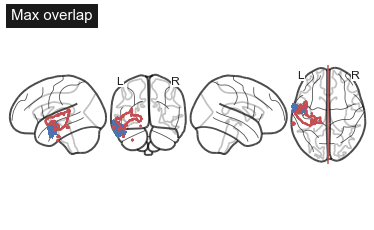

/Users/shreyasindurkar/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/shreyasindurkar/opt/anaconda3/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


Flechsig_Atlas
/Users/shreyasindurkar/Desktop/Data/Atlases/Flechsig_Atlas/Left/
1000.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:25:53,457 nipype.interface INFO:
	 stdout 2023-03-15T18:25:53.457362:551679 551679.000000 
230315-18:25:54,339 nipype.interface INFO:
	 stdout 2023-03-15T18:25:54.339535:1573 1573.000000 
230315-18:25:54,671 nipype.interface INFO:
	 stdout 2023-03-15T18:25:54.671393:593 593.000000 
1001.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:25:57,65 nipype.interface INFO:
	 stdout 2023-03-15T18:25:57.065271:551679 551679.000000 
230315-18:25:57,971 nipype.interface INFO:
	 stdout 2023-03-15T18:25:57.970880:594 594.000000 
230315-18:25:58,307 nipype.interface INFO:
	 stdout 2023-03-15T18:25:58.307227:300 300.000000 
1002.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:26:00,722 nipype.interface INFO:
	 stdout 2023-03-15T18:26:00.722269:551679

230315-18:27:10,504 nipype.interface INFO:
	 stdout 2023-03-15T18:27:10.504039:0 0.000000 
1022.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:27:12,932 nipype.interface INFO:
	 stdout 2023-03-15T18:27:12.932445:551679 551679.000000 
230315-18:27:13,818 nipype.interface INFO:
	 stdout 2023-03-15T18:27:13.818095:13093 13093.000000 
230315-18:27:14,148 nipype.interface INFO:
	 stdout 2023-03-15T18:27:14.148509:2205 2205.000000 
1023.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:27:16,579 nipype.interface INFO:
	 stdout 2023-03-15T18:27:16.579822:551679 551679.000000 
230315-18:27:17,448 nipype.interface INFO:
	 stdout 2023-03-15T18:27:17.447755:12901 12901.000000 
230315-18:27:17,777 nipype.interface INFO:
	 stdout 2023-03-15T18:27:17.777606:681 681.000000 
1024.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:27:20,166 nipype.interface INFO:
	 stdout 2023-03-15T18

230315-18:28:29,937 nipype.interface INFO:
	 stdout 2023-03-15T18:28:29.937250:6706 6706.000000 
230315-18:28:30,285 nipype.interface INFO:
	 stdout 2023-03-15T18:28:30.285794:389 389.000000 
1044.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:28:32,677 nipype.interface INFO:
	 stdout 2023-03-15T18:28:32.677036:551679 551679.000000 
230315-18:28:33,544 nipype.interface INFO:
	 stdout 2023-03-15T18:28:33.544447:20403 20403.000000 
230315-18:28:33,872 nipype.interface INFO:
	 stdout 2023-03-15T18:28:33.872603:11387 11387.000000 
1045.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:28:36,271 nipype.interface INFO:
	 stdout 2023-03-15T18:28:36.271296:551679 551679.000000 
230315-18:28:37,132 nipype.interface INFO:
	 stdout 2023-03-15T18:28:37.132166:13087 13087.000000 
230315-18:28:37,461 nipype.interface INFO:
	 stdout 2023-03-15T18:28:37.461520:714 714.000000 
1046.nii.gz
Input resolution: (1.0, 1.0, 1.0)


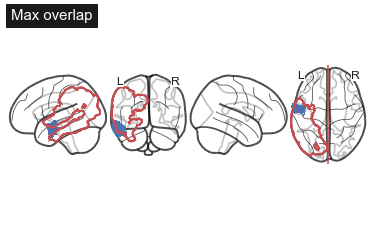

/Users/shreyasindurkar/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/shreyasindurkar/opt/anaconda3/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


Smith_Atlas
/Users/shreyasindurkar/Desktop/Data/Atlases/Smith_Atlas/Left/
1000.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:28:46,668 nipype.interface INFO:
	 stdout 2023-03-15T18:28:46.668206:551679 551679.000000 
230315-18:28:47,545 nipype.interface INFO:
	 stdout 2023-03-15T18:28:47.545269:1566 1566.000000 
230315-18:28:47,874 nipype.interface INFO:
	 stdout 2023-03-15T18:28:47.874191:591 591.000000 
1001.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:28:50,262 nipype.interface INFO:
	 stdout 2023-03-15T18:28:50.262846:551679 551679.000000 
230315-18:28:51,135 nipype.interface INFO:
	 stdout 2023-03-15T18:28:51.134556:3569 3569.000000 
230315-18:28:51,463 nipype.interface INFO:
	 stdout 2023-03-15T18:28:51.463834:0 0.000000 
1002.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:28:53,852 nipype.interface INFO:
	 stdout 2023-03-15T18:28:53.851595:551679 551679

230315-18:30:03,537 nipype.interface INFO:
	 stdout 2023-03-15T18:30:03.536904:944 944.000000 
1022.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:30:05,980 nipype.interface INFO:
	 stdout 2023-03-15T18:30:05.980064:551679 551679.000000 
230315-18:30:06,863 nipype.interface INFO:
	 stdout 2023-03-15T18:30:06.862704:2319 2319.000000 
230315-18:30:07,193 nipype.interface INFO:
	 stdout 2023-03-15T18:30:07.193305:576 576.000000 
1023.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:30:09,652 nipype.interface INFO:
	 stdout 2023-03-15T18:30:09.652738:551679 551679.000000 
230315-18:30:10,520 nipype.interface INFO:
	 stdout 2023-03-15T18:30:10.520451:1477 1477.000000 
230315-18:30:10,849 nipype.interface INFO:
	 stdout 2023-03-15T18:30:10.849548:731 731.000000 
1024.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:30:13,283 nipype.interface INFO:
	 stdout 2023-03-15T18:3

230315-18:31:23,263 nipype.interface INFO:
	 stdout 2023-03-15T18:31:23.263350:1359 1359.000000 
230315-18:31:23,590 nipype.interface INFO:
	 stdout 2023-03-15T18:31:23.590700:218 218.000000 
1044.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:31:26,0 nipype.interface INFO:
	 stdout 2023-03-15T18:31:25.999960:551679 551679.000000 
230315-18:31:26,873 nipype.interface INFO:
	 stdout 2023-03-15T18:31:26.872974:1346 1346.000000 
230315-18:31:27,203 nipype.interface INFO:
	 stdout 2023-03-15T18:31:27.203775:674 674.000000 


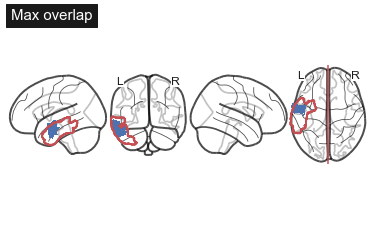

/Users/shreyasindurkar/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/shreyasindurkar/opt/anaconda3/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


Harvard_Oxford_Atlas
/Users/shreyasindurkar/Desktop/Data/Atlases/Harvard_Oxford_Atlas/Left/
1.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:31:30,791 nipype.interface INFO:
	 stdout 2023-03-15T18:31:30.791275:5605 5605.000000 
230315-18:31:31,626 nipype.interface INFO:
	 stdout 2023-03-15T18:31:31.626449:89716 89716.000000 
230315-18:31:31,934 nipype.interface INFO:
	 stdout 2023-03-15T18:31:31.934518:0 0.000000 
2.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:31:32,241 nipype.interface INFO:
	 stdout 2023-03-15T18:31:32.241687:5605 5605.000000 
230315-18:31:33,82 nipype.interface INFO:
	 stdout 2023-03-15T18:31:33.081641:15917 15917.000000 
230315-18:31:33,385 nipype.interface INFO:
	 stdout 2023-03-15T18:31:33.384877:0 0.000000 
3.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:31:33,691 nipype.interface INFO:
	 stdout 2023-03-15T18:31:33.691156:5605 5605.000

230315-18:32:02,639 nipype.interface INFO:
	 stdout 2023-03-15T18:32:02.638981:5605 5605.000000 
230315-18:32:03,469 nipype.interface INFO:
	 stdout 2023-03-15T18:32:03.468947:27185 27185.000000 
230315-18:32:03,775 nipype.interface INFO:
	 stdout 2023-03-15T18:32:03.774873:0 0.000000 
24.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:32:04,82 nipype.interface INFO:
	 stdout 2023-03-15T18:32:04.082168:5605 5605.000000 
230315-18:32:04,912 nipype.interface INFO:
	 stdout 2023-03-15T18:32:04.912141:8523 8523.000000 
230315-18:32:05,218 nipype.interface INFO:
	 stdout 2023-03-15T18:32:05.218688:0 0.000000 
25.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:32:05,528 nipype.interface INFO:
	 stdout 2023-03-15T18:32:05.528161:5605 5605.000000 
230315-18:32:06,356 nipype.interface INFO:
	 stdout 2023-03-15T18:32:06.356282:5880 5880.000000 
230315-18:32:06,659 nipype.interface INFO:
	 stdout 2023-03-15T18:32:06

230315-18:32:35,466 nipype.interface INFO:
	 stdout 2023-03-15T18:32:35.466014:0 0.000000 
46.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:32:35,780 nipype.interface INFO:
	 stdout 2023-03-15T18:32:35.780439:5605 5605.000000 
230315-18:32:36,670 nipype.interface INFO:
	 stdout 2023-03-15T18:32:36.670009:6765 6765.000000 
230315-18:32:36,982 nipype.interface INFO:
	 stdout 2023-03-15T18:32:36.981855:0 0.000000 
47.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:32:37,298 nipype.interface INFO:
	 stdout 2023-03-15T18:32:37.298779:5605 5605.000000 
230315-18:32:38,137 nipype.interface INFO:
	 stdout 2023-03-15T18:32:38.137380:1185 1185.000000 
230315-18:32:38,444 nipype.interface INFO:
	 stdout 2023-03-15T18:32:38.444681:0 0.000000 
48.nii.gz
Input resolution: (1.0, 1.0, 1.0)
Reference resolution: (1.0, 1.0, 1.0)
230315-18:32:38,748 nipype.interface INFO:
	 stdout 2023-03-15T18:32:38.748313:5605 5605.0000

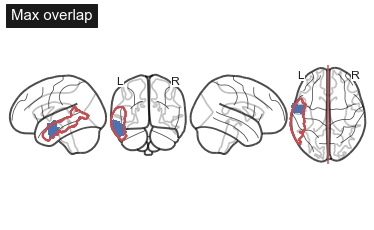

Total execution time: 1489.6015207767487 seconds


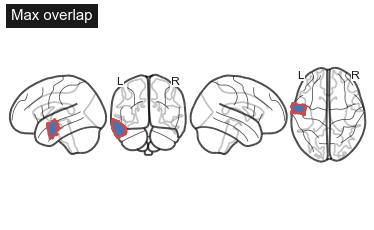

In [4]:
#To determine the time taken for the execution of the function
import time

start_time = time.time()

#Assign variables and store the outputs of the function
dice_dictionary, output_text = tcca_all_atlases.tcca(target_img,'left')

end_time = time.time()

total_time = end_time - start_time

print(f"Total execution time: {total_time} seconds")

#Sorting the dictionary in the ascending order of keys
sorted_keys = sorted(dice_dictionary.keys())
sorted_values = [dice_dictionary[key] for key in sorted_keys]

In [5]:
print(output_text)

['Maximum Overlap of 0.02831960394717656 at ctx-lh-BA37 in Brodmann_Atlas', 'Maximum Overlap of 0.02836739892313503 at ctx-lh-K37 in Kleist_Atlas', 'Maximum Overlap of 0.1109736431732049 at ctx-lh-temporal in Campbell_Atlas', 'Maximum Overlap of 0.0390764400676543 at Area_TG_dorsal in Glasser_Atlas', 'Maximum Overlap of 0.002284843869002285 at S Acoustic radiation in Juelich_hist_Atlas', 'Maximum Overlap of 0.07108369401618676 at ctx-lh-CT3_par in EconomoCT_Atlas', 'Maximum Overlap of 0.03980897843316168 at ctx-lh-F44 in Flechsig_Atlas', 'Maximum Overlap of 0.03361962887788459 at ctx-lh-tempmed in Smith_Atlas', 'Maximum Overlap of 1.0 at Middle Temporal G A D in Harvard_Oxford_Atlas']


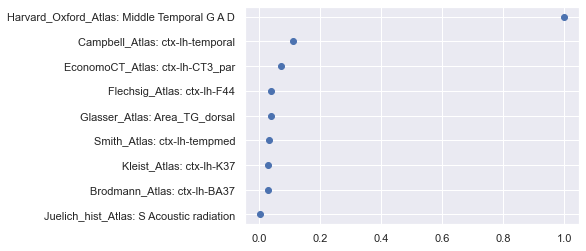

In [6]:
#Sorting the dictionary in the ascending order of keys
sorted_keys = sorted(dice_dictionary.keys())
sorted_values = [dice_dictionary[key] for key in sorted_keys]
plt.scatter(sorted_keys, sorted_values)
plt.show()